Soveltava matematiikka ja fysiikka ohjelmoinnissa

Fysiikan tehtävät 4 ja 6

In [1]:
# 4. Suorita noin 20s testimittaus eri antureilla, esimerkiksi kiihtyvyys, GPS ja magnetometri. 
# Tuo data Pythoniin ja vastaa kaikkien anturien kohdalla seuraaviin kysymyksiin:
# a) Onko näytteenottotaajuus vakio? Mikä on keskimääräinen näytteenottotaajuus? 
# b) Mitkä ovat näytteenottotaajuuden suurin ja pieni arvo aineistossa? 
# c) Piirrä näytteenottotaajuuden histogrammi kolmen eri anturin tapauksessa.

#Näytteenottotaajuus (Hertsiä, Hz), kertoo, kuinka monta kertaa sekunnin aikana sensorin lukema tallentuu

Text(0.5, 1.0, 'Magnetometrin näytteenottovälit')

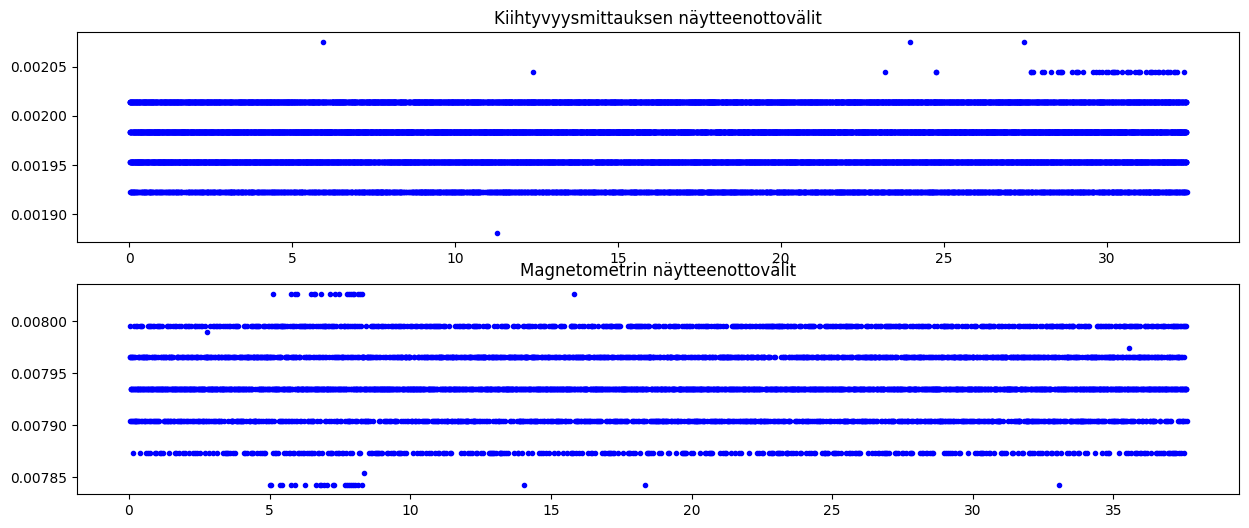

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_a = pd.read_csv('./Data/Kiihtyvyys_12.11.2025.csv')
df_m = pd.read_csv('./Data/Magnetometri_12.11.2025.csv')

#Tutkitaan näytteenottoväliä (sampling interval), eli peräkkäisten havaintojen välillä kuluvaa aikaa
#Esim. 0.028947s - 0.020982s

sampl_int_a = df_a['Time (s)'].diff()
sampl_int_m = df_m['Time (s)'].diff()

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(df_a['Time (s)'],sampl_int_a,'b.')
plt.title('Kiihtyvyysmittauksen näytteenottovälit')
plt.subplot(2,1,2)
plt.plot(df_m['Time (s)'],sampl_int_m,'b.')
plt.title('Magnetometrin näytteenottovälit')
#Näytteenottoväli (ja näytteenottotaajuus) ei ole vakio

Text(0.5, 1.0, 'Magnetometrin näytteenottotaajuus')

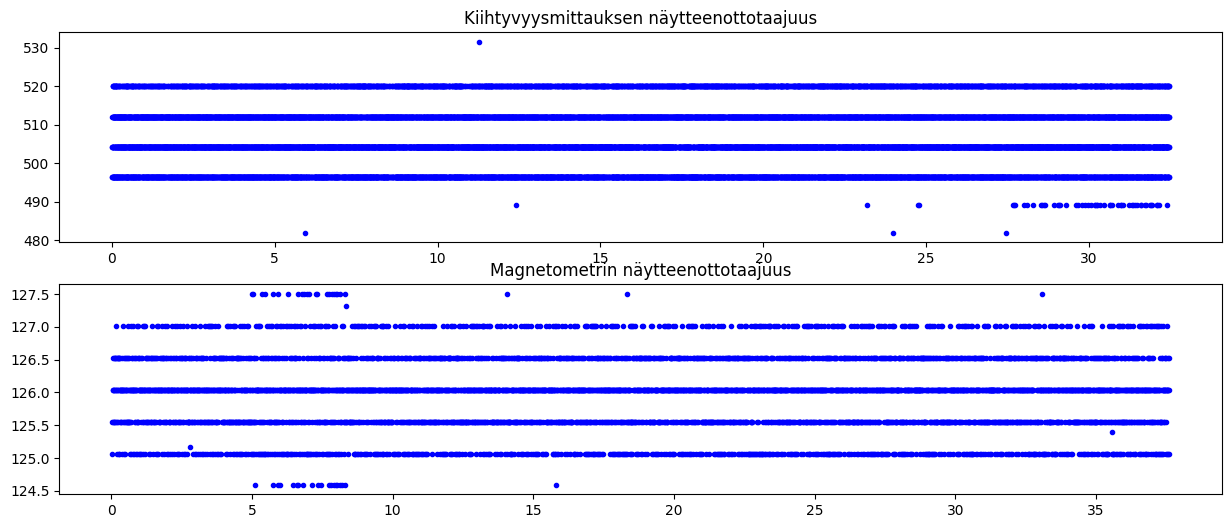

In [12]:
#Lasketaan näytteenottotaajuus ja piirretään sen kuvaajat
#Näytteenottotaajuus = havaintojen määrä sekunnin aikana
f_a = 1/sampl_int_a #Näytteenottotaajuus on näytteenottovälin käänteisluku
#Samalla tavalla, kuin taajuus on jaksonajan käänteisluku. 
f_m = 1/sampl_int_m

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(df_a['Time (s)'],f_a,'b.')
plt.title('Kiihtyvyysmittauksen näytteenottotaajuus')
plt.subplot(2,1,2)
plt.plot(df_m['Time (s)'],f_m,'b.')
plt.title('Magnetometrin näytteenottotaajuus')
#Näytteenottoväli (ja näytteenottotaajuus) ei ole vakio

In [18]:
#Minimi, maksimi, keskiarvo
import numpy as np
print('Kiihtyvyyden mittauksen keskimääräinen näytteenottotaajuus on', np.round(f_a.mean(),1),'Hz')
print('Kiihtyvyyden mittauksen pienin näytteenottotaajuus on', np.round(f_a.min(),1),'Hz')
print('Kiihtyvyyden mittauksen suurin näytteenottotaajuus on', np.round(f_a.max(),1),'Hz \n')

print('Magnetometrin keskimääräinen näytteenottotaajuus on', np.round(f_m.mean(),1),'Hz')
print('Magnetometrin pienin näytteenottotaajuus on', np.round(f_m.min(),1),'Hz')
print('Magnetometrin suurin näytteenottotaajuus on', np.round(f_m.max(),1),'Hz')

Kiihtyvyyden mittauksen keskimääräinen näytteenottotaajuus on 506.4 Hz
Kiihtyvyyden mittauksen pienin näytteenottotaajuus on 481.9 Hz
Kiihtyvyyden mittauksen suurin näytteenottotaajuus on 531.5 Hz 

Magnetometrin keskimääräinen näytteenottotaajuus on 126.0 Hz
Magnetometrin pienin näytteenottotaajuus on 124.6 Hz
Magnetometrin suurin näytteenottotaajuus on 127.5 Hz


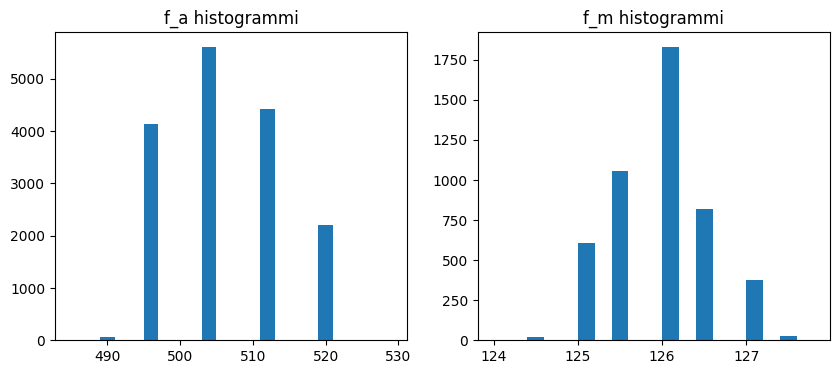

In [32]:
#Histogrammi
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(f_a,bins = np.arange(485,530,2))
plt.title('f_a histogrammi')
plt.subplot(1,2,2)
plt.hist(f_m, bins = np.arange(124,128,0.2))
plt.title('f_m histogrammi')
plt.show()

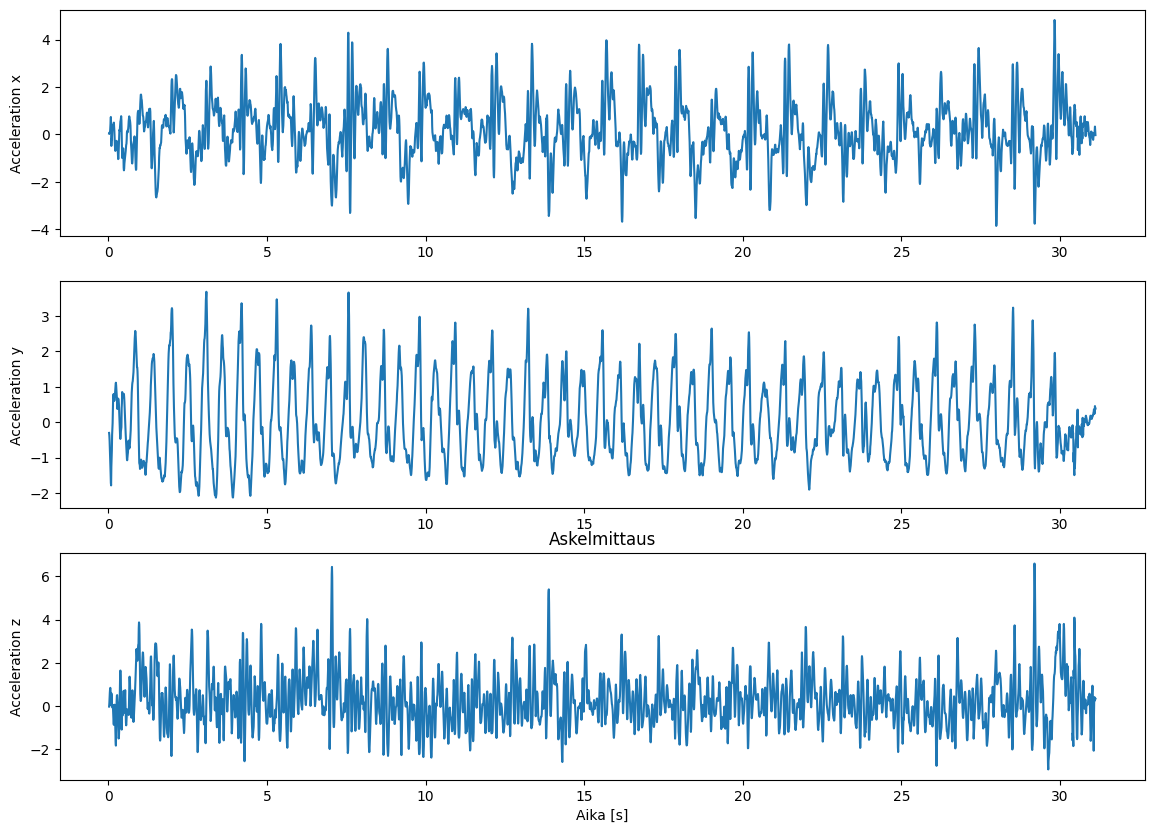

In [ ]:
#  Suorita ainakin minuutin mittainen havaintosarja, jonka aikana kävelet tasaista reipasta 
# vauhtia ja samalla mittaat kiihtyvyyttä (Without g) Phyphox -sovelluksella. 
# Voit pitää puhelinta mittauksen aikana kädessä tai taskussa jne., 
# mutta älä muuta paikkaa mittauksen aikana. Laske askeleesi kävelyn aikana ja merkitse tulos muistiin. 

#             a) Tuo havaintodata Pythoniin ja piirrä sen kuvaaja. 
#             b) Tutki, miten askelet näkyvät havainnoissa jaksollisena liikkeenä
#             c) Määrittele, mikä kiihtyvyyden komponentti näyttää jaksollisuuden parhaiten 
#               ja valitse se seuraaviin kohtiin. 
#             d) Määritä suodatus, jonka avulla voit poistaa valitusta kiihtyvyyden komponentista selvästi 
#               askeltaajuutta pienemmät ja suuremmat taajuudet. 
#             e) Laske askelten määrä suodatetusta datasta, voit esimerkiksi tutkia nollakohtien ylityksien, 
#               tai minimien ja maksimien määrää. 

df = pd.read_csv('./Data/askeldata.csv')

plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.ylabel('Acceleration x')
plt.subplot(3,1,2)
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.ylabel('Acceleration y')
plt.subplot(3,1,3)
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.ylabel('Acceleration z')
plt.title('Askelmittaus')
plt.xlabel('Aika [s]')
plt.show()

#Datan y-komponentissa on nähtävästi yksi täysi jakso askelta kohti
#Johtuu kehon liikkeestä kävellessä. 
#Käytetään analyysissä y-komponenttia df['Linear Acceleration y (m/s^2)']

In [35]:
#Askelmittarin tuli pystyä laskemaan jaksojen määrä y-komponentista.
#Havaintodatassa on kuitenkin pientä kohinaa (vaihtelua/epätasaisuutta), joten siitä suoraan
#on vaikea laskea jaksoja automaattisesti
#Tällä kurssilla opitaan muutama menetelmä askelmäärän laskuun:

#####    Menetelmä 1: Suodatus   #####
#Tässä poistetaan häiriöt ja lasketaan sitten, kuinka monta kertaa y-komponentti ylittää nollatason 
# (voitaisiin myös laskea minimit tai maksimit.)

#Tuodaan filtterifunktiot. Jos scipy puuttuu: pip install scipy
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff,  nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

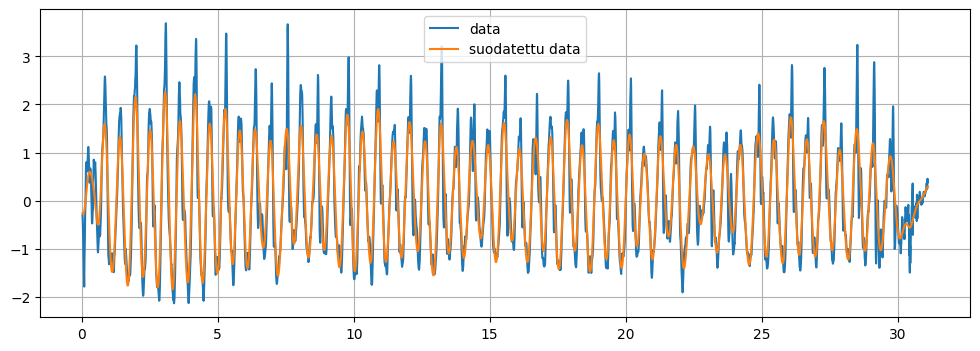

Askelten määrä on 52.5


In [52]:
#Data suodatetaan alipäästösuodattimella, joka poistaa siitä valittua cut-off -taajuutta suuremmilla
#taajuuksilla tapahtuvat vaihtelut.
#Käytännössä dataa "tasoitetaan", eli alipäästösuodatin vastaa jossain määrin liukuvaa keskiarvoa. 
data = df['Linear Acceleration y (m/s^2)']
T_tot = df['Time (s)'].max() #Koko datan pituus
n = len(df['Time (s)']) #Datapisteiden lukumäärä
fs = n/T_tot #Näytteenottotaajus, OLETETAAN VAKIOKSI
nyq = fs/2 #Nyqvistin taajuus, suurin taajuus, joka datasta voidaan havaita
order = 3
cutoff = 1/0.4 #Cut-off taajuus, tätä suuremmat taajuuden alipäästösuodatin poista datasta
#Cut-off -taajuuden tulee olla riittävän pieni, jotta data yleensäkin suodattuu
#Cut-off -taajuuden ei tule olla niin pieni, että se suodattaisi pois askelia
data_filt = butter_lowpass_filter(data, cutoff, nyq, order)

#Piirretään kuvaa, jossa alkuperäinen ja suodatettu signaali
plt.figure(figsize=(12,4))
plt.plot(df['Time (s)'],data,label = 'data')
plt.plot(df['Time (s)'],data_filt,label = 'suodatettu data')
#plt.axis([0,8,-3,3])
plt.grid()
plt.legend()
plt.show()

#Lasketaan askelet
#Tutkitaan, kuinka usein suodatettu signaali ylittää nollatason
jaksot = 0
for i in range(n-1):
    if data_filt[i]/data_filt[i+1] < 0: #True jos arvoilla data_filt[i] ja data_filt[i+1] on eri etumerkki --> nollan ylitys
        jaksot = jaksot + 1/2

print('Askelten määrä on', jaksot ) #Nolla ylitetään kaksi kertaa jokaista jaksoa kohti